# Importing Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the Image

In [2]:
img = cv2.imread("test_images/virat.jpg")
img.shape

(168, 300, 3)

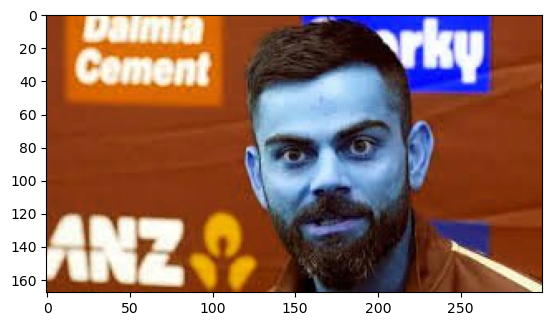

In [3]:
plt.imshow(img)

# Converting into a gray image

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(168, 300)

In [5]:
gray

array([[ 56,  56,  56, ...,  56,  56,  56],
       [ 56,  56,  56, ...,  56,  56,  56],
       [ 56,  56,  56, ...,  56,  56,  56],
       ...,
       [ 47,  47,  47, ..., 246, 245, 231],
       [ 49,  47,  45, ..., 229, 229, 234],
       [ 46,  44,  43, ..., 230, 233, 241]], dtype=uint8)

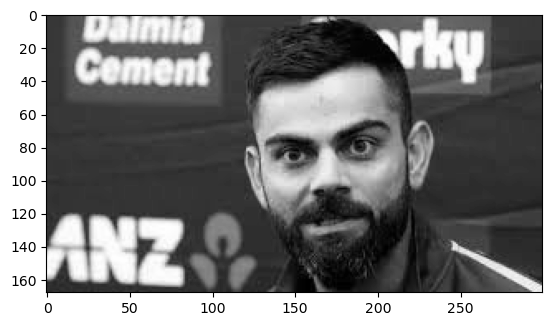

In [6]:
plt.imshow(gray, cmap='gray')

# Face Detection using Haar Cascades

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[113,  39, 112, 112]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(113, 39, 112, 112)

# Drawing a rectangle around the face

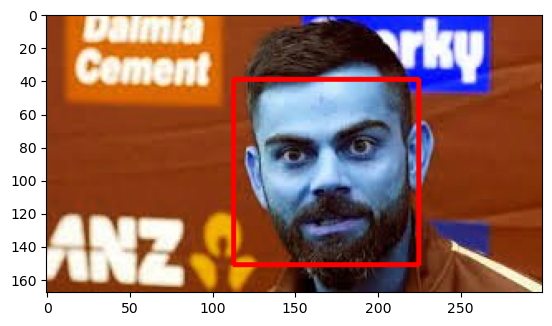

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

# Detecting the eyes and drawing rectangles around it 

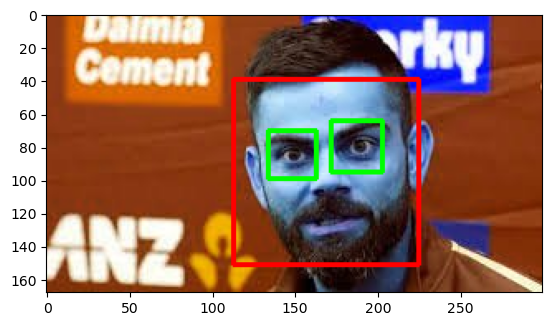

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

# Plotting only the face

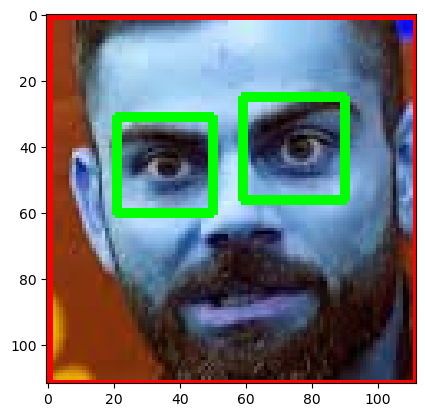

In [11]:
plt.imshow(roi_color, cmap='gray')

# Creating a function to detect images with two eyes

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

# Testing the function

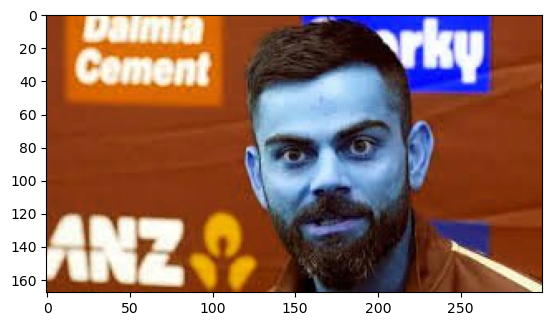

In [13]:
original_image = cv2.imread("test_images/virat.jpg")
plt.imshow(original_image)

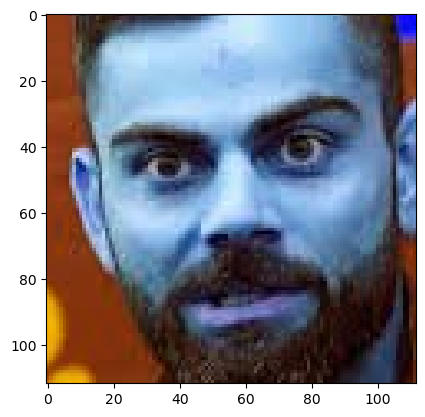

In [14]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/virat.jpg')
plt.imshow(cropped_image)

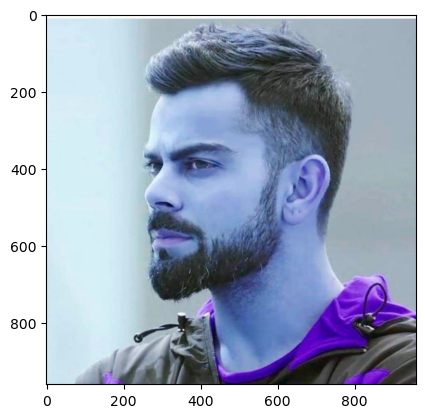

In [15]:
org_image_obstructed = cv2.imread('./test_images/virat1.jpg')
plt.imshow(org_image_obstructed)

In [16]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/virat1.jpg')
cropped_image_no_2_eyes

# Initializing current and cropped directory

In [17]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

# Storing name of subdirectories into a list

In [18]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['./dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

# Creating cropped folder

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
cropped_image_dirs = []
celebrities_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrities_name = img_dir.split('/')[-1]
    print(celebrities_name)
    
    celebrities_file_names_dict[celebrities_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrities_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrities_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrities_file_names_dict[celebrities_name].append(cropped_file_path)
            count += 1   

lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ./dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [22]:
celebrities_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrities_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrities_file_names_dict[celebrities_name] = file_list
celebrities_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi12.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi14.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi17.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi21.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi24.png',
  './dataset/cropped/lionel_messi\

# Assigning number for each celebrity

In [23]:
class_dict = {}
count = 0
for celebrities_name in celebrities_file_names_dict.keys():
    class_dict[celebrities_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

# Preprocessing : Using wavelet transform as a feature for training our model


### In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

In [24]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img

    # converting to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    # converting to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # computing coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    # Processing Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

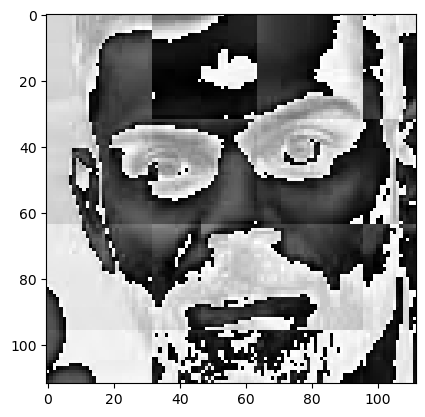

In [25]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

# Vertically stacking trained image and transformed image

In [26]:
X, y = [], []
for celebrities_name, training_files in celebrities_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrities_name])   

In [27]:
len(X)

187

# Converting into float

In [28]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(187, 4096)

# Support Vector Machine Classifier

In [29]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

### Splitting into training and testing dataset

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Creating a pipeline

In [31]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7659574468085106

In [32]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.67      0.75      0.71         8
           2       0.50      0.50      0.50         6
           3       0.90      0.82      0.86        11
           4       0.85      0.92      0.88        12

    accuracy                           0.77        47
   macro avg       0.74      0.74      0.74        47
weighted avg       0.77      0.77      0.77        47



## Using GridSearch to try out different models with different parameters to find best model with best fine tuned parameters

In [33]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [34]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [35]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.764286,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.600000,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.785714,{'logisticregression__C': 1}


In [36]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7659574468085106

In [37]:
best_estimators['svm'].score(X_test,y_test)

0.7446808510638298

In [38]:
best_clf = best_estimators['logistic_regression']

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[9, 0, 1, 0, 0],
       [1, 6, 1, 0, 0],
       [0, 1, 4, 1, 0],
       [0, 0, 1, 9, 1],
       [2, 1, 1, 0, 8]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

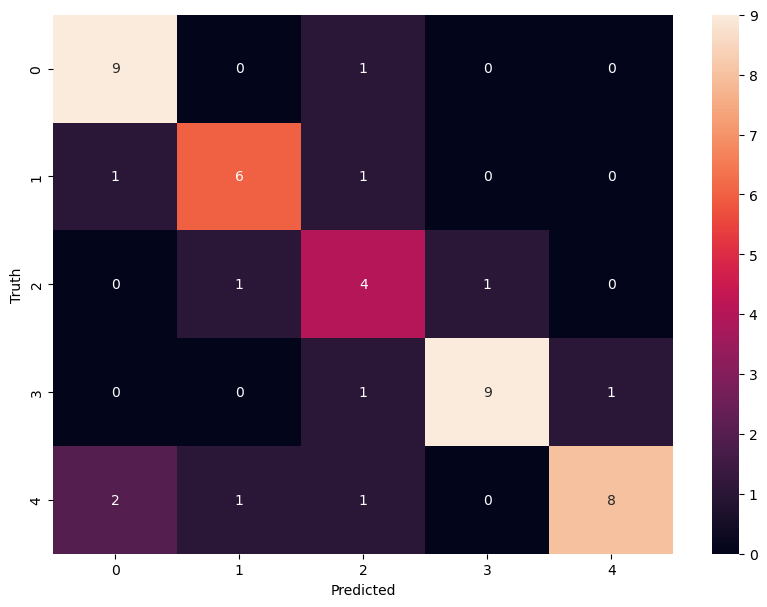

In [40]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Saving the trained model

In [41]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

# Saving Class Dictionary

In [42]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))